<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw9_Na%C3%AFve_Bayes_and_Laplace_Smoothng_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

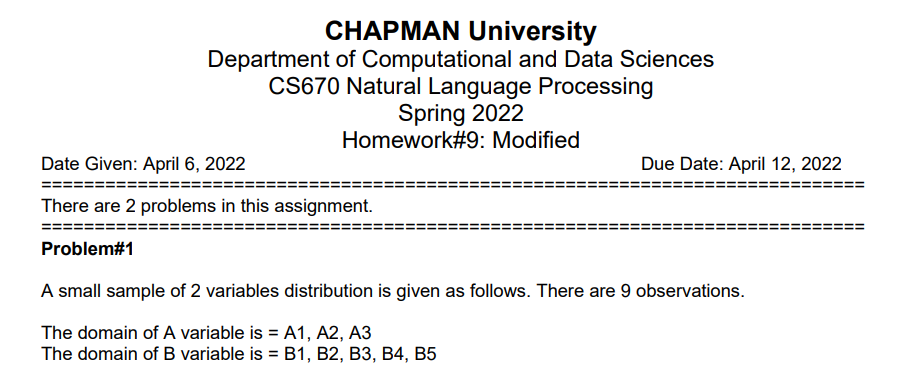

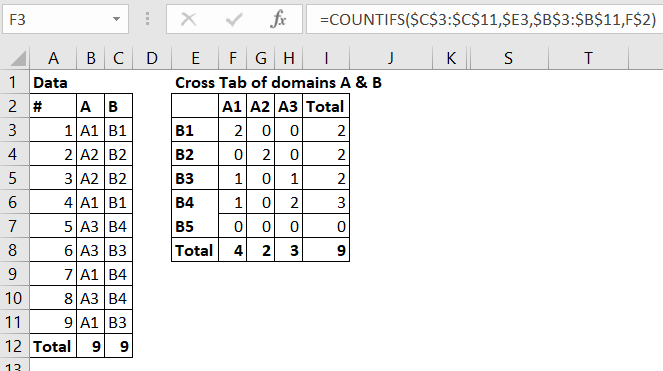

### Conditional Probabilities given the dependencies

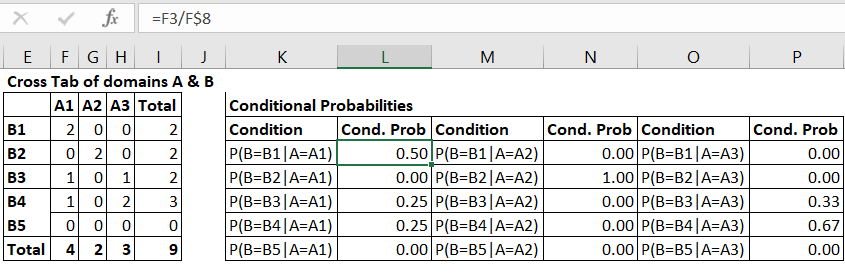

### Laplace Smoothing to handle missing probabilities within the sub domains.
$ Laplace\ Probability = \frac{freaquency + k}{N+ (Domain Count × k)}$  
$ B1\ given\ A1 =2$  
$ Total\ A1 =4 $  
$ Domain\ Count\ of\ B=5$  
$Laplace\ somoothing\ k=1$  
$ Laplace\ Conditional\ Probability(B=B1|A=A1) = \frac{2+1}{4+ (5 × 1)} = \frac{3}{9}=0.33$


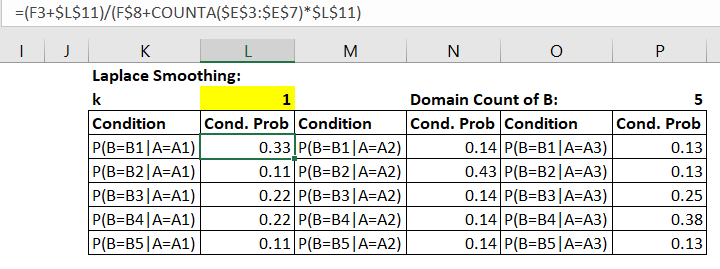

### Problem #2 
#### Building a Naïve Bayes Model to classify the given text is ‘spam’ or not

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = ['money,money,money',
'free money for free gambling fun',
'gambling for fun',
'machine learning for fun,fun,fun',
'free machine learning'
          ]

#### Vectorize the given documents into Bag of Words

In [ ]:
vectorizer = CountVectorizer()
bag_of_words= vectorizer.fit_transform(corpus)
df= pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())

### Add Outcome - 'Spam=True or Spam =False' for each document

---



In [ ]:
df['outcome'] = [True,True,True,False,False]
df

,for,free,fun,gambling,learning,machine,money,outcome
0,0,0,0,0,0,0,3,True
1,1,2,1,1,0,0,1,True
2,1,0,1,1,0,0,0,True
3,1,0,3,0,1,1,0,False
4,0,1,0,0,1,1,0,False


### Group by Oucome with totals. Step 1-Conditional Probability Calculation

In [ ]:
df2=df.groupby(df['outcome']).sum()
df3=df2.copy()
df2.loc['Total',:]= df2.sum(axis=0)
df2.loc[:,'Total'] = df2.sum(axis=1)
df2

,for,free,fun,gambling,learning,machine,money,Total
outcome,,,,,,,,
False,1.0,1.0,3.0,0.0,2.0,2.0,0.0,9.0
True,2.0,2.0,2.0,2.0,0.0,0.0,4.0,12.0
Total,3.0,3.0,5.0,2.0,2.0,2.0,4.0,21.0


### Laplace Smoothing. 
#### Adding k=1 across the matrix ensures that $\frac{freaquency + k}{N+ (Domain Count × k)} $ is ensured in the computational steps

In [ ]:
df2= df3+1
df2.loc['Total',:]= df2.sum(axis=0)
df2.loc[:,'Total'] = df2.sum(axis=1)
df2

,for,free,fun,gambling,learning,machine,money,Total
outcome,,,,,,,,
False,2.0,2.0,4.0,1.0,3.0,3.0,1.0,16.0
True,3.0,3.0,3.0,3.0,1.0,1.0,5.0,19.0
Total,5.0,5.0,7.0,4.0,4.0,4.0,6.0,35.0


### Conditional Probabilities Calculation

In [ ]:
df2=df.groupby(df['outcome']).sum()
df2= df2+1
print(df2)
# domain count
print('Domain Count:',df2.shape[1])
df3=(df2.T / df2.T.sum()).T
print('Conditional probabilties:')
df3

         for  free  fun  gambling  learning  machine  money
outcome                                                    
False      2     2    4         1         3        3      1
True       3     3    3         3         1        1      5
Domain Count: 7
Conditional probabilties:


,for,free,fun,gambling,learning,machine,money
outcome,,,,,,,
False,0.125000,0.125000,0.250000,0.062500,0.187500,0.187500,0.062500
True,0.157895,0.157895,0.157895,0.157895,0.052632,0.052632,0.263158


### Prior

In [ ]:
# Prior
prior = df.groupby('outcome').size().div(len(df))
prior

outcome
False    0.4
True     0.6
dtype: float64

### Function to Classify documents based on Naive Bayes Theorem

In [ ]:
def classify (df_t):
    prob_true=[]
    prob_false=[]
    for (columnName) in df_t:
#         print(df3.iloc[0][columnName],df_t[columnName].values.item(),prior[0])
        prob_false.append(df3.iloc[0][columnName]** df_t[columnName].values.item())
        prob_true.append(df3.iloc[1][columnName]**df_t[columnName].values.item())
    
    p_false= np.prod(prob_false)*prior[0]
    p_true= np.prod(prob_true)*prior[1]
    
    return p_false, p_true

### Prepare the Test Document for classification



In [ ]:
test_doc=['machine learning for free']
bow=vectorizer.fit_transform(test_doc)
df_t= pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
df_t

,for,free,learning,machine
0,1,1,1,1


### Call the classification function to determine the probability of Spam=True & Spam=False

In [ ]:
f,t =classify(df_t)
print(f'Probability of document is a Spam:{t:.8}')
print('Probability of document is not a Spam:',round(f,8))
if f>t :
  print("Not a Spam")

Probability of document is a Spam:4.1436146e-05
Probability of document is not a Spam: 0.00021973
Not a Spam


## Documentation of the Results
* $P(Spam) =0.6$
* $P(not Spam) =0.4$
* $P('for'|Spam) =0.157895$
* $P('for'|not Spam) =0.125000$
* $P('free'|Spam) =0.157895$
* $P('free'|not Spam) =0.125000$
* $P('learning'|Spam) =0.052632$
* $P('learning'|not Spam) =0.187500$
* $P('machine'|Spam) =0.052632$
* $P('machine'|not Spam) =0.187500$

1. $P(Document|Spam) =0.6×0.157895×0.15789×0.052632 × 0.052632=4.1436E-05$
2. $P(Document|Not Spam) =0.4×0.125000×0.125000×0.187500×0.187500=0.00021973$

Clearly, P(Document|Not Spam) is larger so this document is not a spam.